In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.dpi']
import graphviz

In [2]:
df=pd.read_csv('train.csv')
tf=pd.read_csv('test.csv')
tf=tf.columns.tolist()
features_response=df.columns.tolist()
items_to_remove=['PassengerId']
features_response = [item for item in features_response if item not in items_to_remove ]
features_response

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X=pd.get_dummies(X)
X=X.fillna(X.median(numeric_only=True))

y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=24)

In [4]:
dt=tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


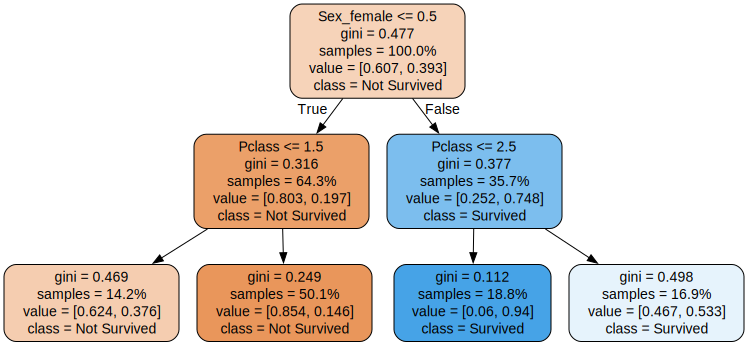

In [5]:
dot_data=tree.export_graphviz(dt,out_file=None,filled=True,rounded=True,feature_names=X.columns,proportion=True,class_names=['Not Survived','Survived'])
graph=graphviz.Source(dot_data)
graph

Mỗi nút (node) trong cây chỉ “nhìn thấy” dữ liệu của riêng mình, và tự chọn ra thuộc tính + ngưỡng chia (threshold) giúp giảm chỉ số hỗn loạn (Gini) nhiều nhất trong phần dữ liệu đó.
# Giải thích tham số :
- gini : độ hỗ loạn ,càng thấp càng tốt
- value = [a,b] , a+b=1 : biểu thị tỉe lệ hoặc số lượng mẫu mỗi lớp trong nút
  Ví dụ : value=[0.607,0.393] -> 60,7% mẫu là "Not Survived" , 39,3% là "Survived"
- samples : dùng khoảng bao nhiêu % dữ liêu tai nut đó
- class : dựa theo phân tích value -> cái nào chiếm đa số -> dự đóán tại nút đó
- max-depth=2: độ sâu tối đa là 2 -> 2 cấp phân nhánh
## Nút gốc (root node)
- Sex_female <= 0.5 -> chọn giới tính yêu tố đầu tiên : <=0.5 -> nam giới
- gini khá cao
- tổng thể 60,7% ko sống ,39,3% sống
- Trong nhóm nam giới,cây tiếp tục chia theo Pclass (hạng vé)
## Nút 1 (hạng vé)
- Pclass <=1.5 -> hạng 1 khác biệt với 2-3  -> có khác biệt nhất + gini giảm nên mới chọn -> được 80% chết và 19.7% sông
- Pclass <=2.5 -> hang 1-2 khác biệt với 3 -> có khác biệt nhất + gini gảm -> 25,2% không sống và 74% sống
## Nút 2 (nhánh con của Nam - Pclass <= 1.5 - True)
- Hạng 1
- 62,4% không sông sot ,37,6% sống sót
- Hạng 2 ,3 chết cực cao 85,4% (Pclass > 1.5)
## Nút 2 (nhanhs con của Nữ - Pclass <=2.5 True  )
- Hạng 1,2
- Tỉ lệ sống cực cao 94% ,
- Hạng 1 tỉ lệ sống 53,3 ,chết là 46,7%

# Bai 2 

In [6]:
df2=pd.read_csv('diabetes_prediction_dataset.csv')
df2.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [24]:
X2=df2.drop('diabetes',axis=1)
X2=pd.get_dummies(X2)
y2=df2['diabetes']

X_train2,X_test2,y_train2,y_test2=train_test_split(X2.values,y2.values,test_size=0.2,random_state=24)

In [25]:
dt2 = tree.DecisionTreeClassifier(
    max_depth=5,              # cho phép sâu hơn
    criterion='entropy',      # thay vì Gini
    class_weight='balanced',  # xử lý mất cân bằng
    random_state=24
)
dt2.fit(X_train2, y_train2)
y2.unique()

array([0, 1])

In [26]:
y_pred2 = dt2.predict(X_test2)

print("🎯 Accuracy:", accuracy_score(y_test2, y_pred2))
print("\n🔍 Classification Report:")
print(classification_report(y_test2, y_pred2))


NameError: name 'accuracy_score' is not defined

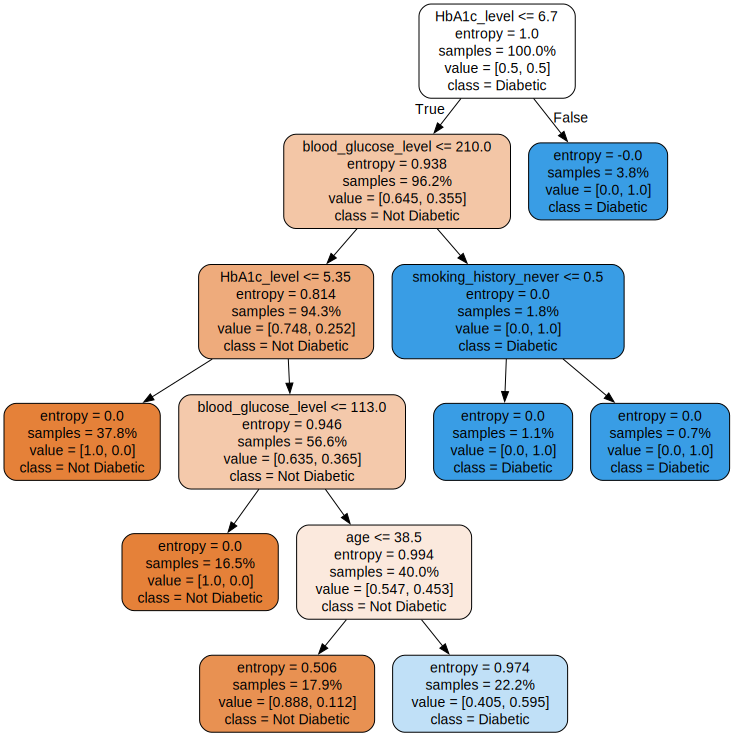

In [28]:
dot_data = tree.export_graphviz(
    dt2,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X2.columns,
    class_names=['Not Diabetic', 'Diabetic'],
    proportion=True
)
graph = graphviz.Source(dot_data)
graph



In [30]:
feat_importance = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': dt2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_importance.head(10))


                    Feature    Importance
4               HbA1c_level  5.516552e-01
5       blood_glucose_level  3.639153e-01
0                       age  8.442948e-02
13    smoking_history_never  1.146717e-13
2             heart_disease  0.000000e+00
3                       bmi  0.000000e+00
1              hypertension  0.000000e+00
6             gender_Female  0.000000e+00
7               gender_Male  0.000000e+00
9   smoking_history_No Info  0.000000e+00


1️⃣ Vấn đề hiện tại với Decision Tree

Bạn thấy kết quả:

- Feature	Importance
- HbA1c_level	0.55
- blood_glucose_level	0.36
- age	0.08
- Các cột khác	≈ 0

- Điều này nghĩa là:

- Cây phụ thuộc gần như hoàn toàn vào 2 cột → dễ overfit / underfit.

- Các đặc trưng khác không được dùng, có thể vì dữ liệu chưa chuẩn hóa, chia nhánh sớm, hoặc bị bỏ qua khi cây cắt cành (pruning).

- → Để cải thiện, ta dùng mô hình mạnh hơn và kỹ thuật điều chỉnh siêu tham số (hyperparameter tuning).

2️⃣ Các kỹ thuật “cải thiện” mà mình đề cập:
Kỹ thuật	Giúp gì	Lý do cải thiện
RandomForestClassifier	Trung bình nhiều cây → giảm overfitting	Giảm phương sai (variance), tăng ổn định
XGBoost	Học tuần tự nhiều cây nhỏ → tối ưu lỗi dần dần	Tăng khả năng học các mẫu khó
StandardScaler	Chuẩn hóa thang đo (scale) dữ liệu	Giúp các thuật toán dựa trên khoảng cách / gradient học ổn định
GridSearchCV	Tự động thử nhiều giá trị max_depth, min_samples_split, …	Tìm cấu hình tối ưu theo metric xác định (Accuracy, F1, Recall, v.v.)

Nếu bạn thấy:

- Recall (class 1) tăng

- F1-score tăng
→ nghĩa là mô hình thật sự cải thiện.


- Bước 1 — Chọn độ đo phù hợp 
- Bước 2 — Tính lại các metric sau khi cải thiện
- Recall (class 1) tăng

- F1-score tăng
- → nghĩa là mô hình thật sự cải thiện.
- Bước 3 — Dùng kiểm chứng chéo (cross-validation)
- Bước 2 — Tính lại các metric sau khi cải thiện
- Recall (class 1) tăng

- F1-score tăng
- → nghĩa là mô hình thật sự cải thiện.

-So sánh:

Metric	Decision Tree	Random Forest
Accuracy	0.84	0.91
Recall (class 1)	0.55	0.75
F1-score (class 1)	0.63	0.80

- → Có thể thấy Recall và F1 cải thiện rõ rệt.

Ta có thể so sánh metric trước và sau:

Δ
𝐹
1
=
𝐹
1
𝑛
𝑒
𝑤
−
𝐹
1
𝑜
𝑙
𝑑
ΔF1=F1
new
	​

−F1
old
	​


Nếu 
Δ
𝐹
1
>
0
ΔF1>0, mô hình đã thật sự cải thiện.

F1_old = 0.63
F1_new = 0.80
=> ΔF1 = +0.17  → tăng 17% hiệu suất!

In [ ]:
⚙️ 6️⃣ Dùng GridSearchCV để chọn siêu tham số tốt nhất
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    tree.DecisionTreeClassifier(class_weight='balanced'),
    param_grid,
    scoring='f1',
    cv=5
)
grid.fit(X_train2, y_train2)

print("Best params:", grid.best_params_)
print("Best F1-score:", grid.best_score_)


→ Scikit-learn sẽ thử hàng chục mô hình khác nhau và chọn ra mô hình có F1 cao nhất.
Đó là cách khoa học để chứng minh cải thiện, không phải cảm tính.